In [81]:
# importing packages numpy, pandas, json, matplotlib, seaborn.
import numpy as np  
import pandas as pd 
import json  
import matplotlib.pyplot as plt 
import seaborn as sns

In [82]:
# Opening JSON file
data_f = open('data.json') 
# returns JSON object as a dictionary
data = json.load(data_f) 
 # closing JSON file
data_f.close()

In [83]:
type(data) 

dict

In [84]:
Cities = list(data.keys())
len(Cities)

623

In [85]:
# Creating an Empty Dataframe
Data = pd.DataFrame()                               

for city in Cities:
    try:
        # Convert the city-wise restaurant data to pandas Dataframe
        DF = pd.DataFrame(data[city]['restaurants']).T  
        
        # add City column for each restaurants in that city
        City = [city for i in range(DF.shape[0])]
        DF['City'] = City
        
        # Because no sub-region so considering city as sub-region
        SubRegion = City                                          
        DF['SubRegion'] = SubRegion
        
        # Concatenate to main Dataframe
        Data = pd.concat([Data,DF])
     
    except:
        
        Subregions = list(data[city].keys())
        for region in Subregions:
            
            # Convert the city-wise restaurant data to pandas Dataframe
            DF = pd.DataFrame(data[city][region]['restaurants']).T
            
            # City
            City = [city for i in range(DF.shape[0])]
            # Add City column for each restaurants in that city
            DF['City'] = City
            
            # Sub-region
            SubRegion = [region for i in range(DF.shape[0])]
            
            # add sub-region column for each restaurants in that city
            DF['SubRegion'] = SubRegion
            Data = pd.concat([Data,DF])
        
Data.shape

(181404, 13)

In [60]:
# Save our original Dataframe
Data.to_csv('Swiggy_data.csv')

In [61]:
# Read the saved dataframe
df = pd.read_csv('Swiggy_data.csv')

## Data Cleaning

In [63]:
# Checking for Duplicates
# Restaurant 'id' should be always unique
# Dropping the duplicate rows
df = df.rename(columns={'Unnamed: 0':'id', 'name':'Restaurant'})
df.drop_duplicates(subset='id', keep='first', inplace = True)
df.shape

(160621, 14)

In [66]:
# Rearranging the column order

df = df.loc[:,['id','Restaurant','City','SubRegion','cost','cuisine','rating','rating_count','lic_no',
               'address','menu','link', 'type', 'price']]
df.head()

,id,Restaurant,City,SubRegion,cost,cuisine,rating,rating_count,lic_no,address,menu,link,type,price
0,567335,AB FOODS POINT,Abohar,Abohar,₹ 200,"Beverages,Pizzas",--,Too Few Ratings,22122652000138,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",{'Burger': {'Aloo Tikki Burger': {'price': '40...,https://www.swiggy.com/restaurants/ab-foods-po...,NaN,NaN
1,531342,Janta Sweet House,Abohar,Abohar,₹ 200,"Sweets,Bakery",4.4,50+ ratings,12117201000112,"Janta Sweet House, Bazar No.9, Circullar Road,...",{'Breakfast': {'Veg Grilled Sandwich': {'price...,https://www.swiggy.com/restaurants/janta-sweet...,NaN,NaN
2,158203,theka coffee desi,Abohar,Abohar,₹ 100,Beverages,3.8,100+ ratings,22121652000190,"theka coffee desi, sahtiya sadan road city",{'Recommended': {'Cafe Latte Coffee': {'price'...,https://www.swiggy.com/restaurants/theka-coffe...,NaN,NaN
3,187912,Singh Hut,Abohar,Abohar,₹ 250,"Fast Food,Indian",3.7,20+ ratings,22119652000167,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",{'Recommended': {'Malai Chaap': {'price': '200...,https://www.swiggy.com/restaurants/singh-hut-n...,NaN,NaN
4,543530,GRILL MASTERS,Abohar,Abohar,₹ 250,"Italian-American,Fast Food",--,Too Few Ratings,12122201000053,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...","{'Veg Burgers': {'Junior': {'price': '65', 've...",https://www.swiggy.com/restaurants/grill-maste...,NaN,NaN


In [86]:
# Checking for null values
Null = df.isnull().sum().reset_index().rename({0:'Null'}, axis = 1)
Null['% Null'] = round((Null['Null']/df.shape[0])*100, 0)
Null.sort_values(by='% Null', ascending = False)

,index,Null,% Null
6,rating,87016,59.0
0,id,0,0.0
1,Restaurant,0,0.0
2,City,0,0.0
3,SubRegion,0,0.0
4,cost,0,0.0
5,cuisine,0,0.0
7,rating_count,0,0.0
8,lic_no,0,0.0
9,address,0,0.0


In [68]:
# Dropping type and price columns because they have more than 90% null values and null values rows too.
df = df.drop(['type','price'], axis =1)
df.dropna(inplace = True, axis = 0)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df.shape

(148290, 12)

In [74]:
df.head()

,id,Restaurant,City,SubRegion,cost,cuisine,rating,rating_count,lic_no,address,menu,link
0,567335,AB FOODS POINT,Abohar,Abohar,₹ 200,"Beverages,Pizzas",NaN,Too Few Ratings,22122652000138,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",{'Burger': {'Aloo Tikki Burger': {'price': '40...,https://www.swiggy.com/restaurants/ab-foods-po...
1,531342,Janta Sweet House,Abohar,Abohar,₹ 200,"Sweets,Bakery",4.4,50+ ratings,12117201000112,"Janta Sweet House, Bazar No.9, Circullar Road,...",{'Breakfast': {'Veg Grilled Sandwich': {'price...,https://www.swiggy.com/restaurants/janta-sweet...
2,158203,theka coffee desi,Abohar,Abohar,₹ 100,Beverages,3.8,100+ ratings,22121652000190,"theka coffee desi, sahtiya sadan road city",{'Recommended': {'Cafe Latte Coffee': {'price'...,https://www.swiggy.com/restaurants/theka-coffe...
3,187912,Singh Hut,Abohar,Abohar,₹ 250,"Fast Food,Indian",3.7,20+ ratings,22119652000167,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",{'Recommended': {'Malai Chaap': {'price': '200...,https://www.swiggy.com/restaurants/singh-hut-n...
4,543530,GRILL MASTERS,Abohar,Abohar,₹ 250,"Italian-American,Fast Food",NaN,Too Few Ratings,12122201000053,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...","{'Veg Burgers': {'Junior': {'price': '65', 've...",https://www.swiggy.com/restaurants/grill-maste...


## 1. Rating Analysis

In [69]:
Rating = []
for i in range(df.shape[0]):
    try:
        Rating.append(float(df.rating[i]))     
    except:
        if df.rating[i] == '--' or 'NA':
            Rating.append(np.NaN)            # Where rating is not givem keep it null
        else:
            print(df.rating[i])
print(len(Rating))
df.rating = Rating
df.rating.dtypes

148290


dtype('float64')

### i. Restaurant with Maximum rating throughout the dataset

In [92]:
print('The maximum rating Restaurant are:')
df[df.rating ==df.rating.max()][['Restaurant', 'rating']]


The maximum rating Restaurant are:


,Restaurant,rating
757,Pablo Premium Kitchen,5.0
1021,The best diet corner,5.0
9758,Creams and Bites,5.0
9808,Bansal's Thali & Combo Meals,5.0
10239,GOWHEY- HEALTHY DESSERT COMPANY,5.0
...,...,...
140515,Chenab Kitchen,5.0
146038,Cream House,5.0
147204,HINDUSTANI BURGER,5.0
147205,KEBAB NATION,5.0


### ii. Restaurant Counts w.r.t rating 

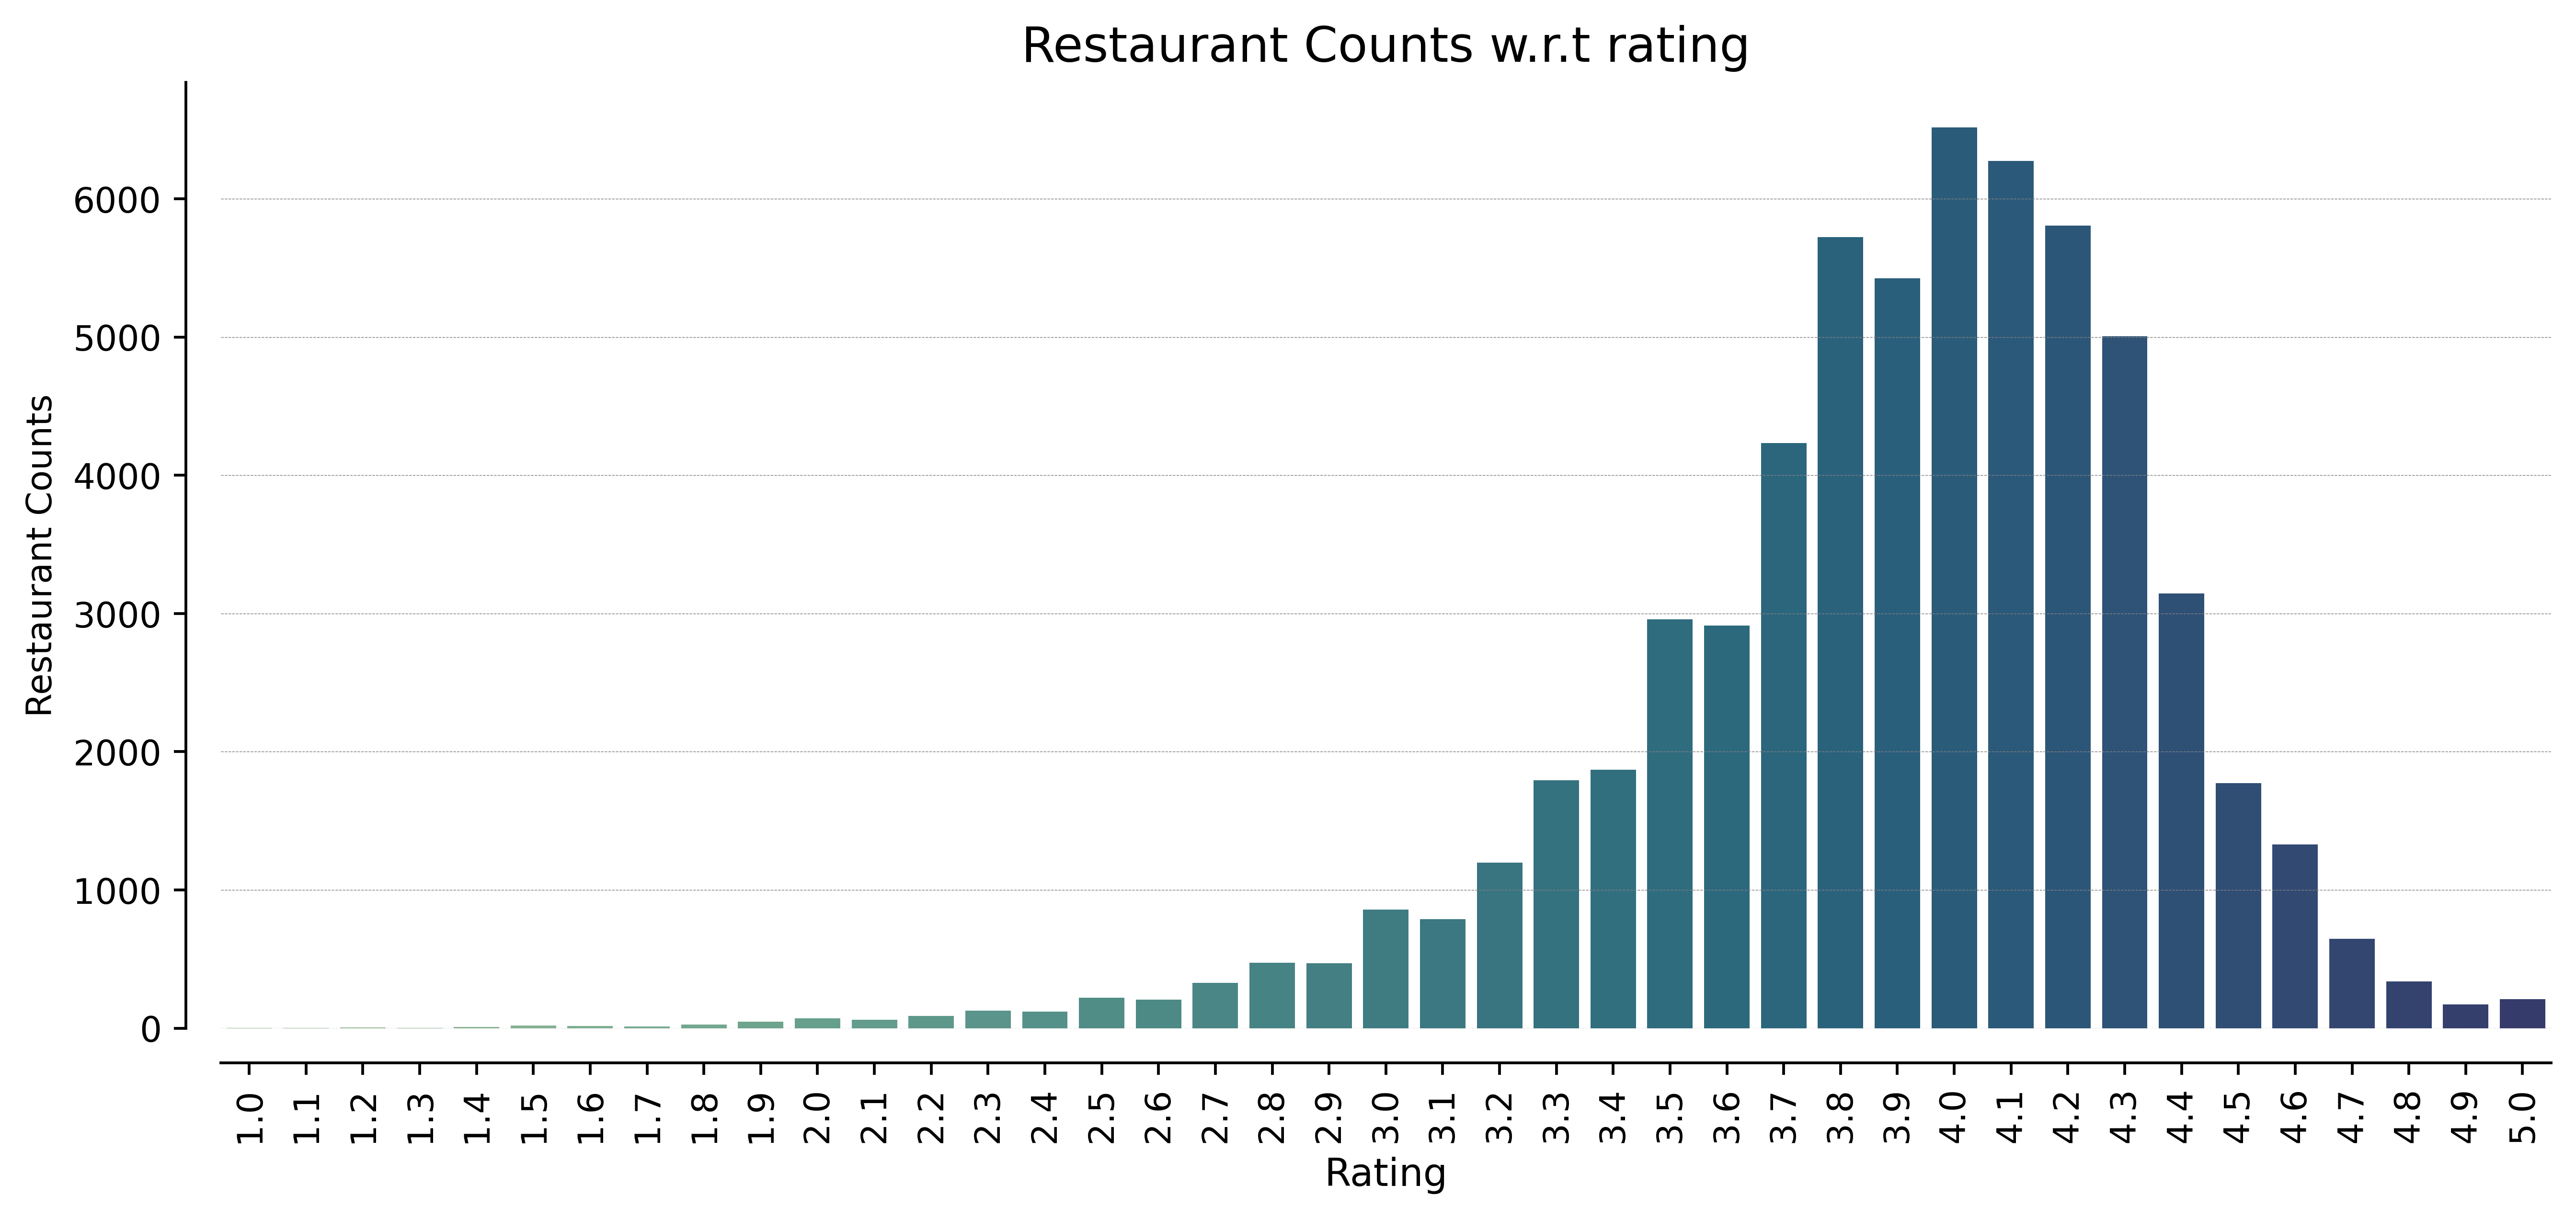

In [71]:
data = df.groupby('rating', as_index = False).agg('count')[['rating','Restaurant']]

# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)   

#sns.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = data,
           x='rating',
           y = 'Restaurant',
           palette= "crest"#'plasma'
          )     
# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   
# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)
# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("Rating", fontsize = 11)                                # Set X label         
plt.ylabel("Restaurant Counts", fontsize = 10)                     # Set Y label
plt.title('Restaurant Counts w.r.t rating', fontsize = 14)         # Set title
plt.show()

## 2. City Analysis

###  i. Number of cities with least number of restaurants listed

In [72]:
Bottom = df.City.value_counts(ascending=True).reset_index().rename({'index':'City', 'City':'Counts'}, axis=1)

Bottom[Bottom['Counts']==Bottom['Counts'].min()]

,City,Counts
0,Hampi,1
1,Kohima,1
2,Naharlagun,1
3,Manali,1
4,Rangpo,1


In [94]:
Bottom[Bottom['Counts']==Bottom['Counts'].min()].to_csv('City.csv')

### ii. Least Popular Cities as per Restaurants Counts  

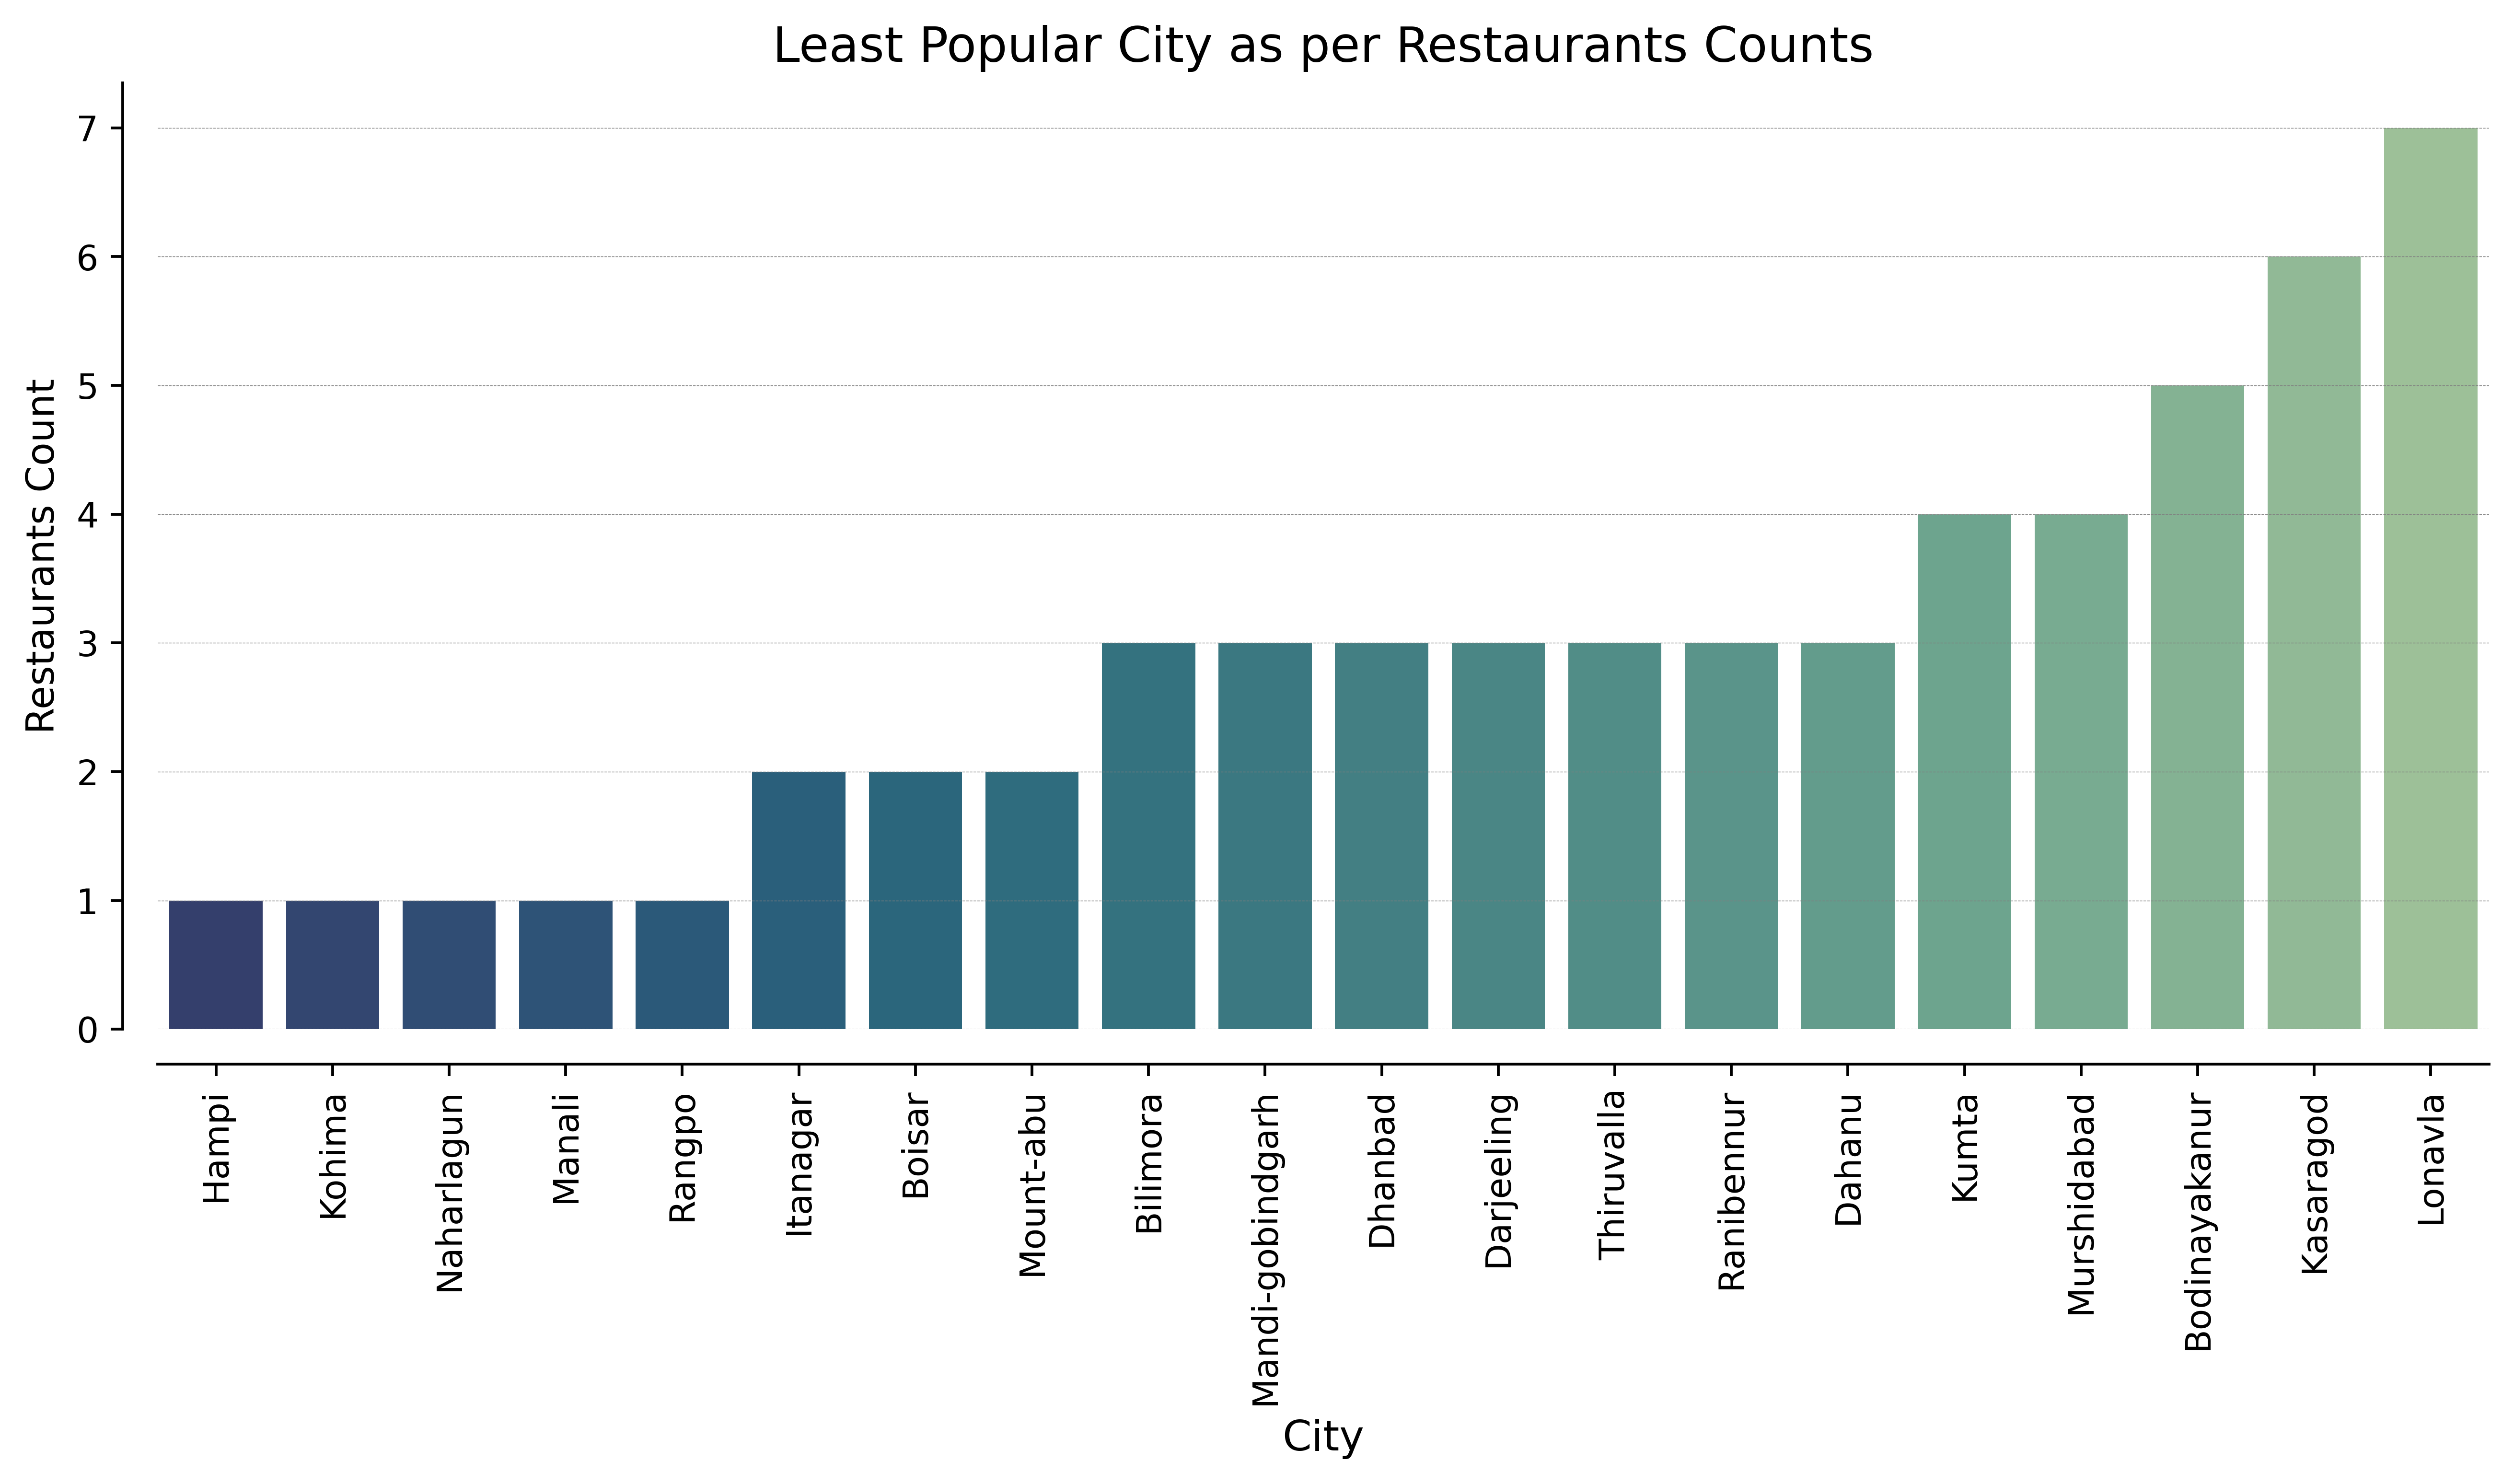

In [73]:
# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)                                       
#sn.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = Bottom.head(20),
           x='City',
           y = 'Counts',
           palette= "crest_r"#'plasma'
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("City", fontsize = 12)                                                # Set X label         
plt.ylabel("Restaurants Count", fontsize = 11)                                   # Set Y label
plt.title('Least Popular City as per Restaurants Counts', fontsize = 14)         # Set title
plt.show()

## 3. Cuisines Analysis

In [75]:
df.cuisine.unique()

array(['Beverages,Pizzas', 'Sweets,Bakery', 'Beverages', ...,
       'Biryani,Thai', 'South American,Andhra',
       'Barbecue,Italian-American'], dtype=object)

### Most popular Cuisines served throughout the dataset [In terms of frequency] 

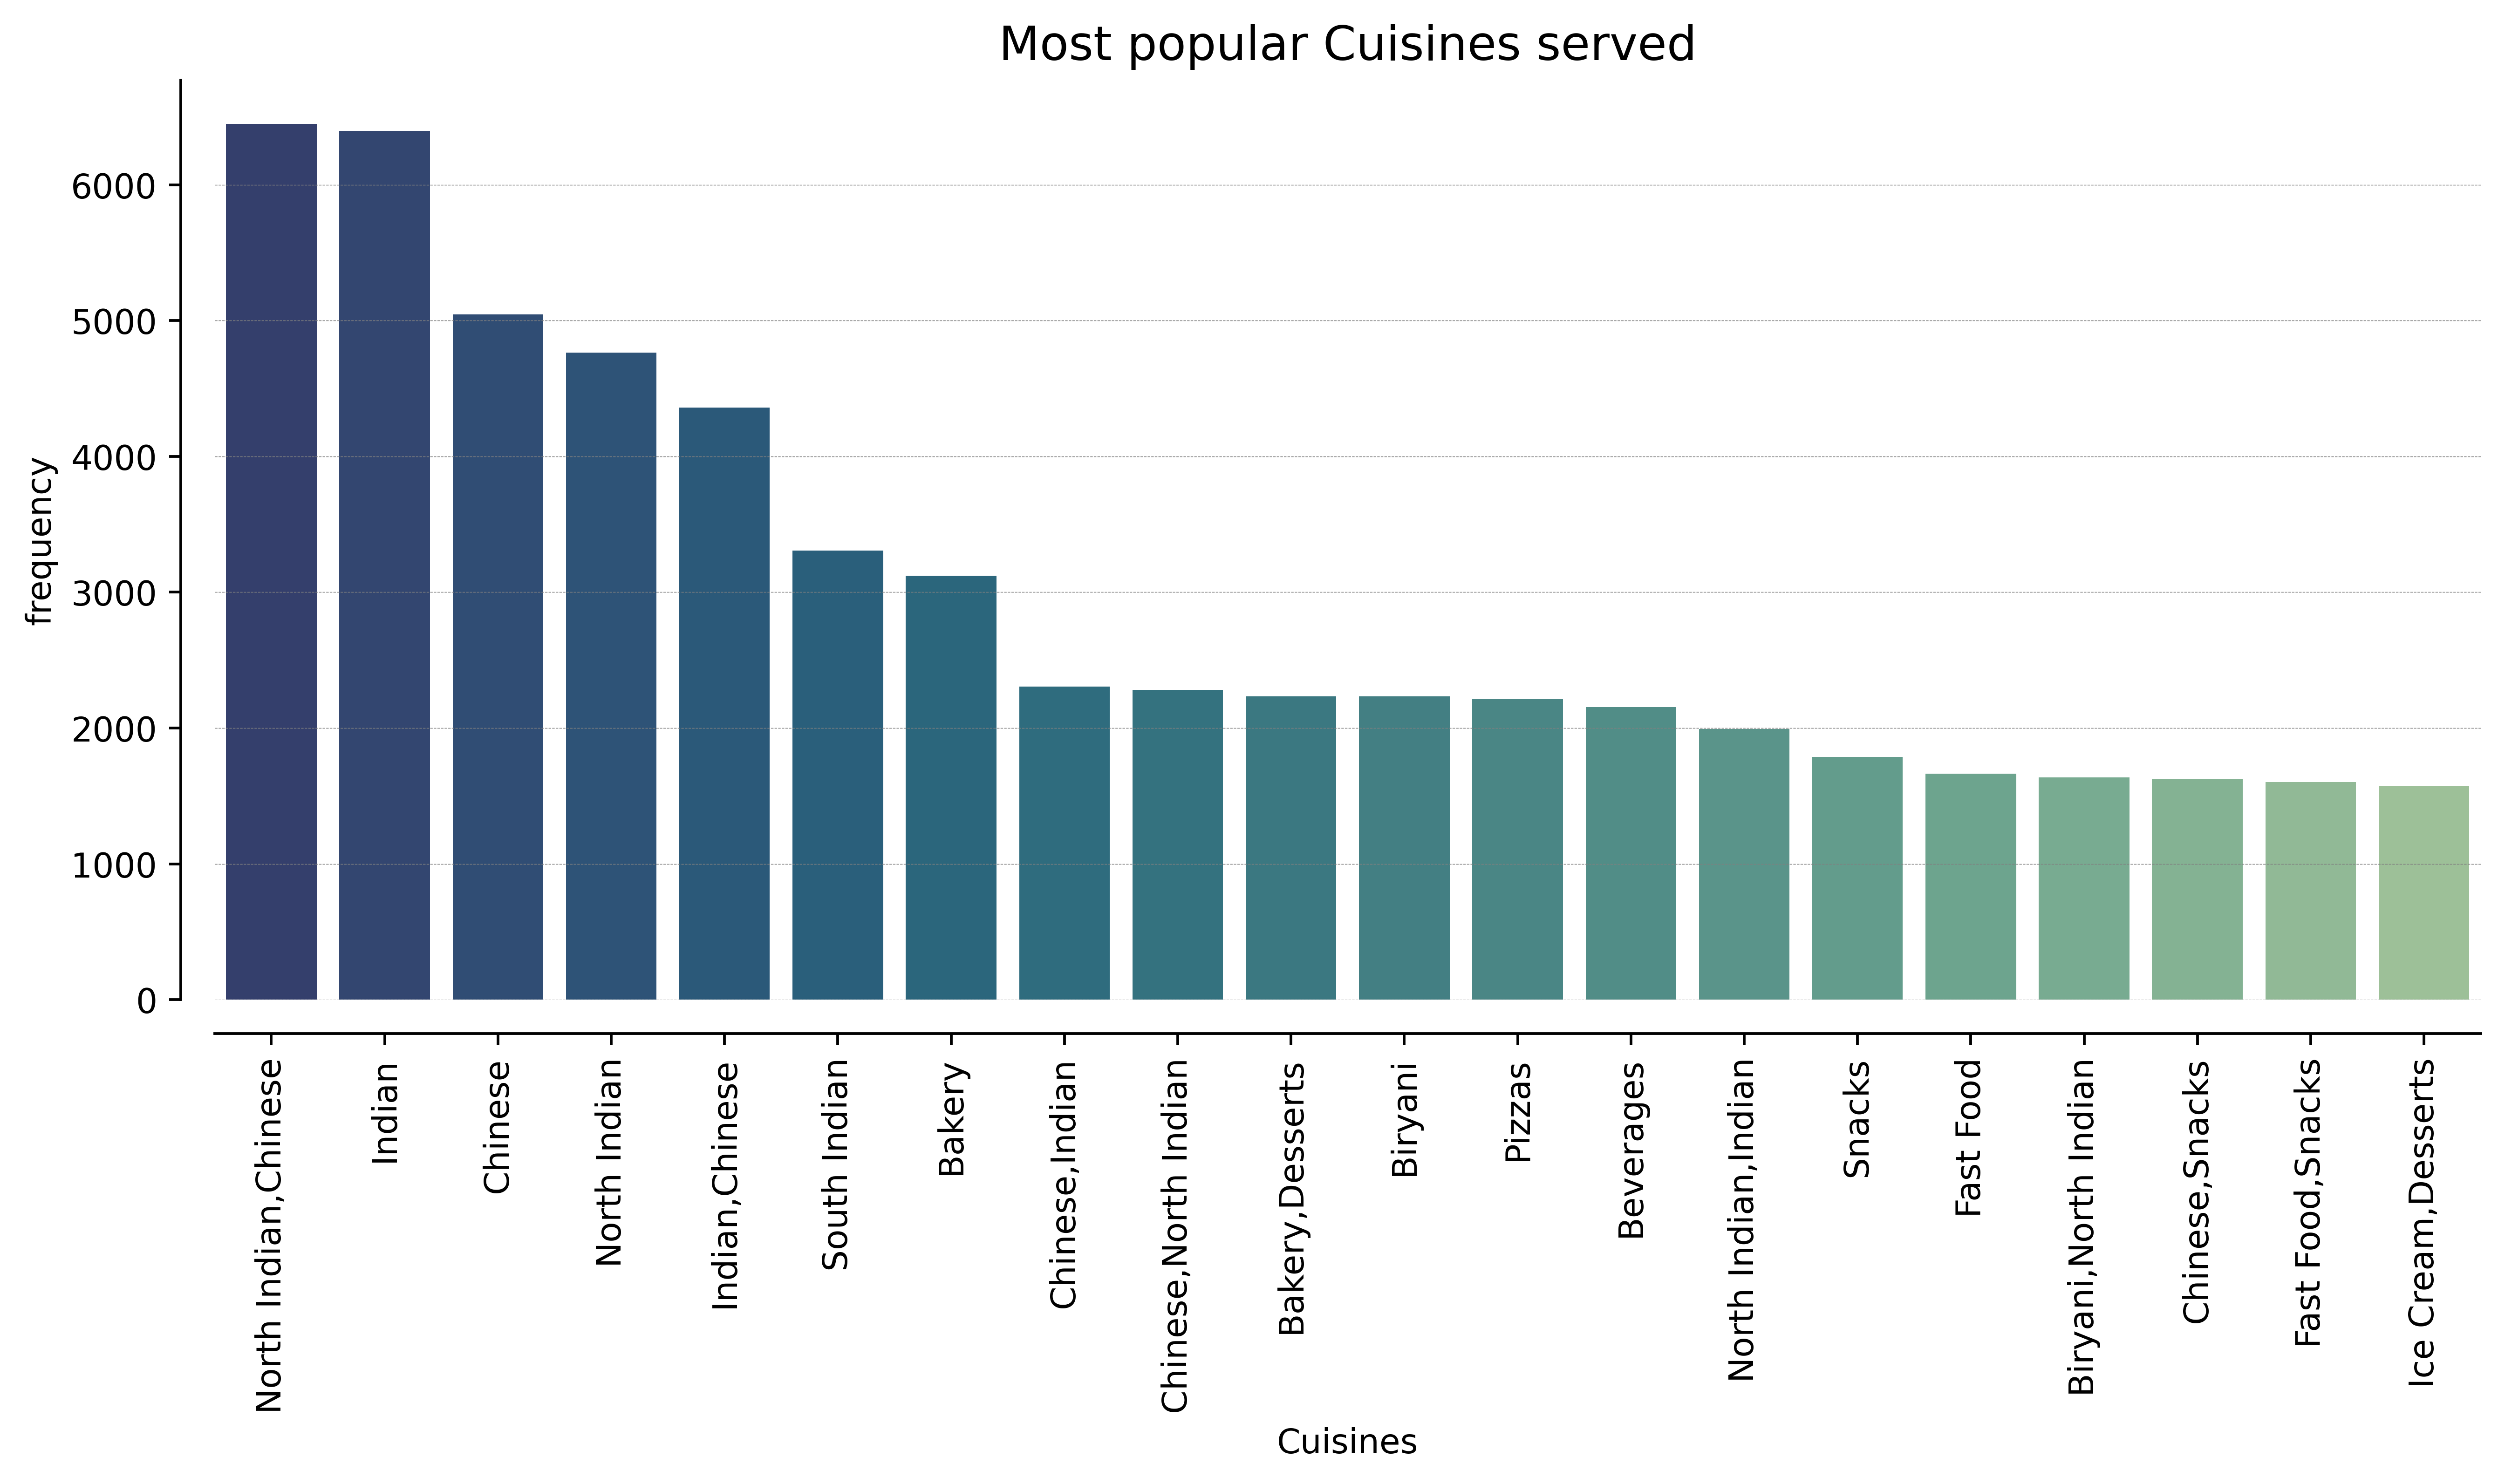

In [76]:
c = df.cuisine.value_counts().reset_index().rename({'index':'Cuisine','cuisine':'frequency'}, axis =1)

# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)                                       
#sn.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = c.head(20),
           x='Cuisine',
           y = 'frequency',
           palette= "crest_r" #'plasma'
          )     
# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("Cuisines", fontsize = 10)                                   # Set X label         
plt.ylabel("frequency", fontsize = 10)                                  # Set Y label
plt.title('Most popular Cuisines served', fontsize = 14)                # Set title
plt.show()